In [1]:
suppressPackageStartupMessages({
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(scCustomize)
  library(scater)
    library(RColorBrewer)
    library(data.table)
    library(stringr)
library(tibble)
    library(tidyr)
    library(scDblFinder)
    library(scCustomize)
})

In [5]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

In [2]:
homo = readRDS(
    glue::glue(
            '/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis',
            '/results/seurat_2/cancer_research_rebuttal/combined_new_5_homo.rds'
        )
)

In [3]:
homo@meta.data$annot %>% unique %>% length

[1] 15

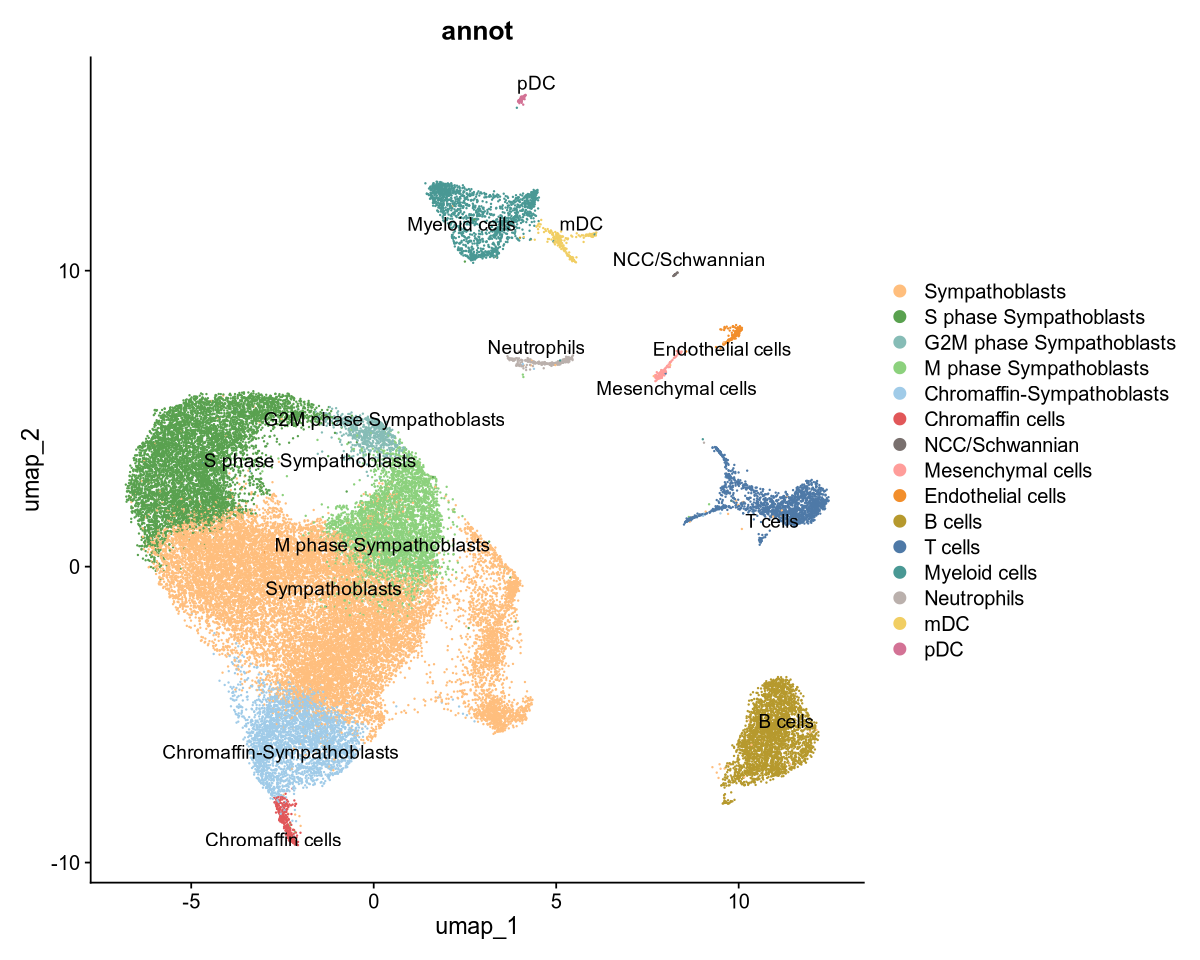

In [7]:
fig.size(8, 10)
color.list = ggthemes::tableau_color_pal('Tableau 20')(20)[1:15]
names(color.list) = homo@meta.data$annot %>% unique

DimPlot(homo, group.by = 'annot',
        reduction = "umap", label = TRUE,
    repel = TRUE) + 
    scale_color_manual(values = color.list)

In [8]:
table(homo$annot)


           Sympathoblasts    S phase Sympathoblasts  G2M phase Sympathoblasts 
                    18216                      6918                       709 
   M phase Sympathoblasts Chromaffin-Sympathoblasts          Chromaffin cells 
                     4485                      3426                       341 
           NCC/Schwannian         Mesenchymal cells         Endothelial cells 
                       28                       181                       214 
                  B cells                   T cells             Myeloid cells 
                     2943                      1752                      1532 
              Neutrophils                       mDC                       pDC 
                      306                       267                       112 

In [9]:
dotplot.sig.df = openxlsx::read.xlsx(
    '../20240805_Figure1C_Dotplot_5-Homozygous_Samples.xlsx',
    sheet ="Dotplot"
)
homo$annot = factor(
    homo$annot, levels=na.omit(dotplot.sig.df$Annotation)) 

In [10]:
table(homo$annot)


           Sympathoblasts    S phase Sympathoblasts  G2M phase Sympathoblasts 
                    18216                      6918                       709 
   M phase Sympathoblasts Chromaffin-Sympathoblasts          Chromaffin cells 
                     4485                      3426                       341 
           NCC/Schwannian         Mesenchymal cells         Endothelial cells 
                       28                       181                       214 
                  B cells                   T cells             Myeloid cells 
                     2943                      1752                      1532 
              Neutrophils                       mDC                       pDC 
                      306                       267                       112 